## Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms
Anna Bottu

MSCS-634: Advanced Big Data and Data Mining

## Step 1: Load and Prepare the Dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Loading the Wine Dataset form sklearn
#Need to import sklearn.datasets library to use it
from sklearn import datasets

#loads the wine dataset and saves it as data
#gets the data as a dataframe so it is easier to analyze the data
data = datasets.load_wine(as_frame=True)
df = data.frame
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

## Data Exploration for Feature Details

In [3]:
#inspecting the columns
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [4]:
#gets a summary of the statistics such as mean, min, max, std
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
#prints 5 rows to look at the values you are working with 
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
#checks to see what the data types are and if any values are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### As you can see above, there are 14 columns where all the first 13 columns are float data type and the last column is int data type with no null values

In [7]:
#another check for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

#### As you can see there are no missing values in any of the columns 

## Data Exploration for class distribution

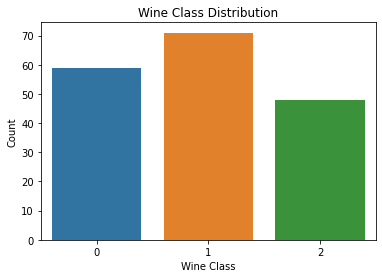

In [8]:
#creates a count plot of how many samples are in each class
sns.countplot(x='target', data=df)
plt.title('Wine Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

In [9]:
#gives the exact number of examples of each class
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

#### As we can see although the dataset is not perfectly balanced it is reasonably balanced

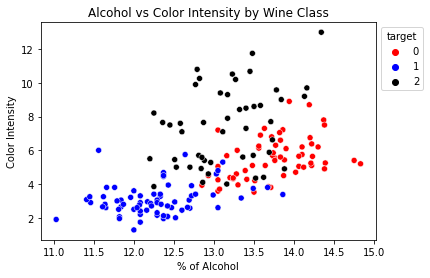

In [10]:
#creates a scatterplot to look at the relationship between the color of the wine and the percentage of alcohol
sns.scatterplot(x='alcohol', y='color_intensity', hue='target', data=df, palette={0: 'red', 1: 'blue', 2: 'black'})

plt.title('Alcohol vs Color Intensity by Wine Class')
plt.xlabel('% of Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='target', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

#### From the scatterplot above, we can conclude that most of the samples from class 1 of the wines have lower percentage of alcohol between 11.0 - ~13.0% and their colro intensity is between 0 - 6, so they are probably white vines. Most of the samples from class 0 have higher percentage of alcohol they are between 13.0 - 15.0% and most of them have a color intensity of lesser than 6 . We can also say that most of samples from class 2 are more intense in the color of the wine.

## z-score normalization 

z-score normalization is a way to scale your data that way the average becomes 0 and the standard deviation becomes 1 to ensure consistent scaling across features.

In [21]:
from sklearn.preprocessing import StandardScaler

X = data.data
y = data.target
feature_names = data.feature_names

#z-score normalization (standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names) 


In [17]:
print("scaled: ", df_scaled.head())

scaled:      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321 

In [18]:
print(df_scaled.mean())

alcohol                        -8.619821e-16
malic_acid                     -8.357859e-17
ash                            -8.657245e-16
alcalinity_of_ash              -1.160121e-16
magnesium                      -1.995907e-17
total_phenols                  -2.972030e-16
flavanoids                     -4.016762e-16
nonflavanoid_phenols            4.079134e-16
proanthocyanins                -1.699639e-16
color_intensity                -1.122697e-17
hue                             3.717376e-16
od280/od315_of_diluted_wines    2.919013e-16
proline                        -7.484650e-18
dtype: float64


In [19]:
print(df_scaled.std())

alcohol                         1.002821
malic_acid                      1.002821
ash                             1.002821
alcalinity_of_ash               1.002821
magnesium                       1.002821
total_phenols                   1.002821
flavanoids                      1.002821
nonflavanoid_phenols            1.002821
proanthocyanins                 1.002821
color_intensity                 1.002821
hue                             1.002821
od280/od315_of_diluted_wines    1.002821
proline                         1.002821
dtype: float64


In [20]:
df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


#### As you can see in the above the means are very close to 0, even though they aren't exactly 0 the difference are so small they can be considered insignificant. Additionally, you can see that the standard deviation is approximately 1, confirming standardization.

# Step 2: Implement K-Means Clustering

### Implement the K-Means Clustering with k=3 and trains the model and obtains the cluster label

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

#implements the k-means clustering with k = 3
k_means = KMeans(n_clusters = 3, random_state=42)
#trains the k-means model and also assigns each data point to a cluster
kmeans_cluster_labels = k_means.fit_predict(X_scaled)


### Calculates the Silhouette Score and Adjusted Rand Index (ARI)

In [39]:
#calculates the Silhouette Score
s_score = silhouette_score(X_scaled, cluster_labels)
print(s_score)

0.2848589191898987


In [40]:
#calculates the ARI
a_score = adjusted_rand_score(y, cluster_labels)
print(a_score)

0.8974949815093207


#### From the results from the K-means clustering with k=3, the Silhouette Score was ~0.28. This score ranges from -1 to 1, where values closer to 1 indicate well-structured clusters, values near 0 suggest overlapping clusters, and negative values may indicate incorrect clustering. A score of 0.28 indicates that while the clusters are somewhat distinct, there is still some overlap between them. Additionally, the ARI ~0.90, which indicates a strong agreement between the predicted clusters and the actual wine classes, showing that the clustering closely aligns with the true labels. 

# Step 3: Implement K-Medoids Clustering

### Implement the K-Medoids Algorithm with k= 3 and trains the model and obtains the cluster labels

In [41]:
!pip install scikit-learn-extra


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/annabottu/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/Users/annabottu/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/Users/annabottu/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/Users/annabottu/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "/Users/annabottu/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/metadata/pkg_resources.py", line 192, in version
    return parse_version(self._dist.

In [47]:
from sklearn_extra.cluster import KMedoids

#implements the k-medoids clustering with k = 3
kmedoids = KMedoids(n_clusters=3, random_state=42)
#trains the k-medoids model and also assigns each data point to a cluster
kmedoids_cluster_labels = kmedoids.fit_predict(X_scaled)

In [49]:
#calculates the Silhouette Score
si_score = silhouette_score(X_scaled, cluster_labels)
print(si_score)

0.26597740204536796


In [50]:
#calculates the ARI
ar_score = adjusted_rand_score(y, cluster_labels)
print(ar_score)

0.7263406645756675


#### From the result from the K-Medoids clustering with k=3, the Silhouette score was ~0.27 so just like the K-mean clustering, it indicates that while the clusters are somewhat distinct, there is still some overlap between them. The ARI score was ~0.73, which means that the K-Medoids clusters are pretty aligned with the actual wine classes.

# Step 4: Visualize and Compare Results

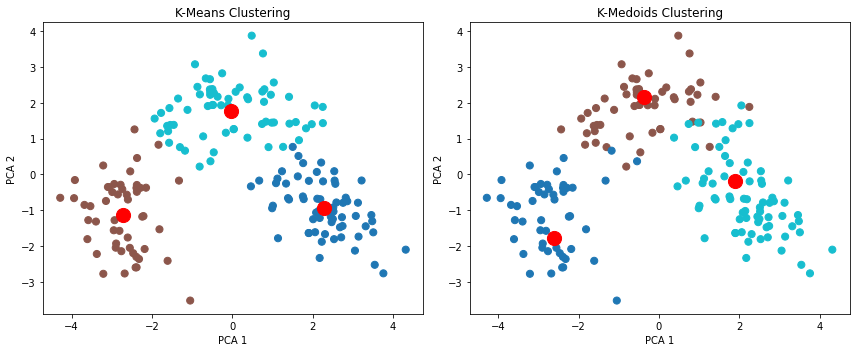

In [68]:
from sklearn.decomposition import PCA

#reduces the number of columns in the dataset but keeps the important ones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#
kmeans_centers = pca.transform(k_means.cluster_centers_)
kmedoids_centers = pca.transform(X_scaled[kmedoids.medoid_indices_])

# Plotting side-by-side
plt.figure(figsize=(12, 5))


#plots the k-means clustering
#places the plot to the left
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_cluster_labels, cmap='tab10', s=50)
#plots the cluster centriod on the plot in red dot
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1],c='red', marker='o', s=200)
plt.title("K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


#plots the k-medoids cluster 
#places the plot to the right side
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_cluster_labels, cmap='tab10', s=50)
#plots the cluster medoids on the plots in the red dot
plt.scatter(kmedoids_centers[:, 0], kmedoids_centers[:, 1],c='red', marker='o', s=200)
plt.title("K-Medoids Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

## Analysis

#### As you can see from the side by side plots of the K-Means and K-Medoids, the K-Means cluster produced a better defined cluster.The cluster for both the k-means and k-medoids look the same but there are less outliers for the k-means clusters the centroids are placed in the middle of the cluster. Where the K-medoids clusters look like they have a couple more outlers and the medoids are not centered like the k-means centroids. K-medoids can be good for data that has outliers, where k-means clustering worked best for this dataset.